In [172]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [173]:
data = pd.read_csv('Datasets/desharnais.csv')

In [174]:
X = data[['TeamExp', 'ManagerExp', 'YearEnd', 'Length', 'Transactions', 'Entities', 'PointsNonAdjust', 'Adjustment', 'PointsAjust', 'Language']]
y = data['Effort']

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [176]:
param_grid = {
    'n_estimators': [100, 200, 300],           # Number of decision trees
    'max_depth': [None, 5, 10],                 # Maximum depth of trees
    'min_samples_split': [2, 5, 10],            # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],              # Minimum number of samples required at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']    # Number of features to consider at each split
}

In [177]:
# Create an instance of the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [178]:
# Perform grid search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

C:\Users\Khoa Le Tri\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\Khoa Le Tri\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\Khoa Le Tri\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 5, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [179]:
# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [180]:
y_pred = best_model.predict(X_test)

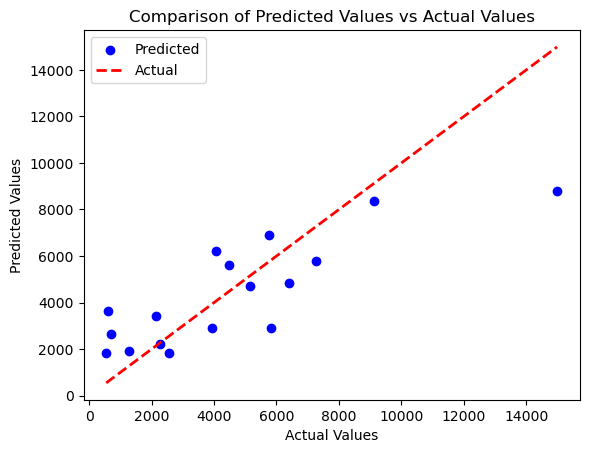

In [181]:
import matplotlib.pyplot as plt

# Assuming you have already trained the SVM regressor and obtained the predicted values 'y_pred'

# Create a scatter plot to compare predicted values with actual values
plt.scatter(y_test, y_pred, color='blue', label='Predicted')

# Add a diagonal line indicating perfect predictions
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Actual')

# Add labels and title to the plot
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Comparison of Predicted Values vs Actual Values')
plt.legend()

# Show the plot
plt.show()

In [182]:
# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Print the evaluation metrics
print("R2 Score:", r2)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("Best Hyperparameters:", best_params)

R2 Score: 0.6430227768072897
Mean Squared Error (MSE): 4554584.386566158
Mean Absolute Error (MAE): 1631.1589351564407
Mean Absolute Percentage Error (MAPE): 84.18823740359532
Best Hyperparameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}


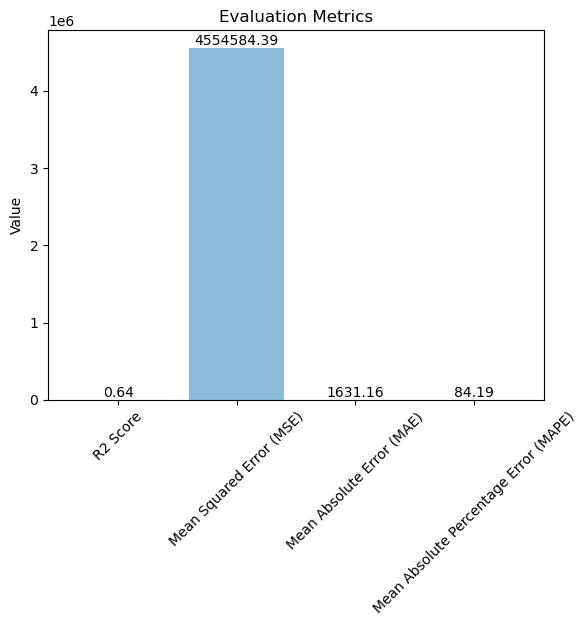

In [185]:
metrics = ['R2 Score', 'Mean Squared Error (MSE)', 'Mean Absolute Error (MAE)', 'Mean Absolute Percentage Error (MAPE)']

# Create a list of evaluation metric values
values = [r2, mse, mae, mape]

# Set the positions of the bars on the x-axis
x_pos = np.arange(len(metrics))

# Create the bar graph
plt.bar(x_pos, values, align='center', alpha=0.5)

# Set the labels for the x-axis and y-axis
plt.xticks(x_pos, metrics, rotation=45)
plt.ylabel('Value')

# Set the title of the graph
plt.title('Evaluation Metrics')

# Display the values on top of each bar
for i, v in enumerate(values):
    plt.text(i, v, str(round(v, 2)), ha='center', va='bottom')

# Show the bar graph
plt.show()